In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
path = "gdrive/My Drive/Colab Notebooks"
!ls  "gdrive/My Drive/zip123/aoi"

#!tar xvf "gdrive/My Drive/zip123/aoi.tar"
#!cp "gdrive/My Drive/zip123/aoi.zip ./"
#!unzip "gdrive/My Drive/zip123/aoi(csv)"
#!unzip "gdrive/My Drive/zip123/aoi"
#!unzip "test_images.zip"
#!unzip "train_images.zip"
#!ls  

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
test.csv  test_images  train.csv  train_images


In [0]:
#test3-1

#read
#train=pd.read_csv('train.csv')
#print(train.shape)
#test=pd.read_csv('test.csv')
#print(test.shape)

#timg=[]
#lab=[]

#set train
#x_train=train['ID']
#y_train=train['Label']
#print(x_train.shape)
#print(y_train.shape)
#print(x_train[0])
#for i in range(train.shape[0]):
#  img = cv2.imread('train_images/'+train['ID'][i])
#  #img = cv2.imread('train_images/'+x_train[i],0)
#  #imgtest = cv2.imread('train_images/'+x_train[i])
#  #imgtest = cv2.cvtColor(imgtest,cv2.COLOR_BGR2GRAY)
#  #print("img:",img.shape)
#  #img = cv2.resize(img,(256,256))
#  img = np.resize(img,(256,256,1))/255
#  #print("img2:",img)
#  timg.append(img)
#  lab.append(train['Label'][i])
#  #print(y_train[i])
#  #print(img)
#x_array = np.asarray(timg,np.float32)

#set test
#x_test=test['ID']
#y_test=test['Label']
#print(x_test)
#print(y_test)
#tstimg=[]
#tstlab=[]
#for i in range(len(x_test)):
  #img=cv2.imread('test_images/'+x_test[i])
  #img = cv2.resize(img,(256,256))
  #img = np.resize(img,(256,256,1))
  #tstimg.append(img)
  #tstlab.append(y_test[i])
#print(test)
#d = np.resize(img,(1,512,512,3))
#x_array = np.asarray(timg)
#tx_array = np.asarray(tstimg,np.float32)/255
#print(x_array)

In [0]:
#train=pd.read_csv('train.csv')
#print(train.shape)
#print(train['Label'][6])

In [0]:
#print(timg[0].shape)
#x = np.reshape(x_array,(256,256,1))
#print(x_array.shape)
#print(len(x_array))
#print(x_array)
#print(tx_array.shape)

In [0]:
import tensorflow as tf
import csv
import pandas as pd
import cv2
import pdb
import random as rn
import numpy as np

In [0]:
#read
#train=pd.read_csv('gdrive/My Drive/zip123/aoi/train.csv')
train=pd.read_csv('train.csv')
print(train.shape)

timg=[]
lab=[]

#set train
for i in range(train.shape[0]):
  #img = cv2.imread('gdrive/My Drive/zip123/aoi/train_images/'+train['ID'][i])
  img = cv2.imread('train_images/'+train['ID'][i],0)
  img = np.resize(img,(256,256,1))/255
  #img = np.reshape(img,(256,256,1))/255
  timg.append(img)
  lab.append(train['Label'][i])
  #print("fin:"+str(i)+"/",train.shape[0])
x_array = np.asarray(timg,np.float32)

(2528, 2)


In [0]:
#set test
#test=pd.read_csv('gdrive/My Drive/zip123/aoi/test.csv')
test=pd.read_csv('test.csv')
print(test.shape)
x_test=test['ID']
tstimg=[]
for i in range(len(x_test)):
  #img=cv2.imread('gdrive/My Drive/zip123/aoi/test_images/'+x_test[i])
  img=cv2.imread('test_images/'+x_test[i],0)
  img = np.resize(img,(256,256,1))/255
  tstimg.append(img)
  #print("fin:"+str(i)+"/",x_test.shape[0])
tx_array = np.asarray(tstimg,np.float32)

(10142, 2)


In [0]:
from keras.utils import *
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import optimizers

Using TensorFlow backend.


In [0]:
model = Sequential()
#mnist 是28x28的灰階圖(28,28,1) = > 28x28=784個輸入
#model.add(Dense(units=256,input_dim=784,kernel_initializer="normal",activation="relu"))
#units=10 : 10個輸出
#model.add(Dense(units=10,kernel_initializer="normal",activation="softmax"))

#print(model.summary())

#model.compile(loss="categorical_crossentropy",optimizer="adam",metrics="accuracy")

#valid  same

model.add(Conv2D(filters=32, kernel_size=(5,5),activation="relu",padding="same",data_format="channels_last",input_shape=(256,256,1)))
model.add(Conv2D(filters=32, kernel_size=(5,5),activation="relu",padding="same",data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2,2),data_format="channels_last"))
#model.add(Dropout(0.25))

#model.add(Conv2D(filters=32, kernel_size=(2,2),activation="relu",padding="same",data_format="channels_last"))
#model.add(Conv2D(filters=32, kernel_size=(2,2),activation="relu",padding="same",data_format="channels_last"))
#model.add(MaxPooling2D(pool_size=(2,2),data_format="channels_last"))
#model.add(Dropout(0.25))

#model.add(Conv2D(filters=64, kernel_size=(4,4),activation="relu",padding="valid",data_format="channels_last"))
model.add(Conv2D(filters=64, kernel_size=(3,3),activation="relu",padding="same",data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2,2),data_format="channels_last"))
#model.add(Dropout(0.25))

#model.add(Conv2D(filters=128, kernel_size=(3,3),activation="relu",padding="valid",data_format="channels_last"))
model.add(Conv2D(filters=128, kernel_size=(3,3),activation="relu",padding="same",data_format="channels_last"))
#model.add(Conv2D(filters=128, kernel_size=(2,2),activation="relu",padding="same",data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2,2),data_format="channels_last"))
#model.add(Dropout(0.25))

#model.add(Conv2D(filters=256, kernel_size=(3,3),activation="relu",padding="same",data_format="channels_last"))
model.add(Conv2D(filters=256, kernel_size=(3,3),activation="relu",padding="same",data_format="channels_last"))
#model.add(Conv2D(filters=256, kernel_size=(2,2),activation="relu",padding="same",data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2,2),data_format="channels_last"))
#model.add(Dropout(0.25))

model.add(Conv2D(filters=512, kernel_size=(3,3),activation="relu",padding="same",data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2,2),data_format="channels_last"))

model.add(Conv2D(filters=512, kernel_size=(3,3),activation="relu",padding="same",data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2,2),data_format="channels_last"))
#model.add(Dropout(0.25))

#model.add(Conv2D(filters=2048, kernel_size=(2,2),activation="relu",padding="valid",data_format="channels_last"))
#model.add(MaxPooling2D(pool_size=(2,2),data_format="channels_last"))

model.add(Flatten())
#model.add(Dropout(0.25))
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(6,activation="softmax"))

#layer_utils.print_summary(model)
print(model.summary())

W0620 17:22:43.886315 140119439689600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0620 17:22:43.906178 140119439689600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0620 17:22:43.910650 140119439689600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0620 17:22:43.946904 140119439689600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0620 17:22:44.072719 140119439689600 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 32)      25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 128)       0         
__________

In [0]:
####
y_train_onehot= np_utils.to_categorical(lab)
####

#print(lab)
#print(y_train_onehot)
adm = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False)
#model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=adm , metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer=adm , metrics=['accuracy'])
train_history = model.fit(x_array,y_train_onehot,validation_split=0.2,epochs=200,batch_size=50,verbose=1)

W0620 17:22:44.172675 140119439689600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0620 17:22:44.184929 140119439689600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0620 17:22:44.304382 140119439689600 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2022 samples, validate on 506 samples
Epoch 1/200
2022/2022 [==============================] - 31s 16ms/step - loss: 1.7243 - acc: 0.2354 - val_loss: 1.6655 - val_acc: 0.2510
Epoch 2/200
2022/2022 [==============================] - 22s 11ms/step - loss: 1.6639 - acc: 0.2690 - val_loss: 1.6643 - val_acc: 0.2510
Epoch 3/200
2022/2022 [==============================] - 22s 11ms/step - loss: 1.5341 - acc: 0.3942 - val_loss: 1.4871 - val_acc: 0.4111
Epoch 4/200
2022/2022 [==============================] - 22s 11ms/step - loss: 1.3122 - acc: 0.4906 - val_loss: 1.1708 - val_acc: 0.5632
Epoch 5/200
2022/2022 [==============================] - 22s 11ms/step - loss: 1.1141 - acc: 0.5895 - val_loss: 1.0416 - val_acc: 0.5988
Epoch 6/200
2022/2022 [==============================] - 22s 11ms/step - loss: 0.9064 - acc: 0.6602 - val_loss: 0.8483 - val_acc: 0.6798
Epoch 7/200
2022/2022 [==============================] - 22s 11ms/step - loss: 0.7817 - acc: 0.7018 - val_loss: 0.7241 - val_acc: 0

In [0]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.show()

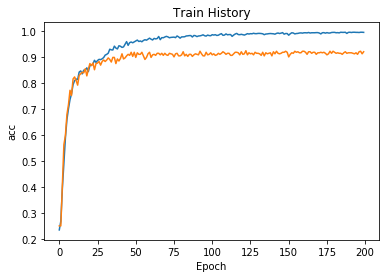

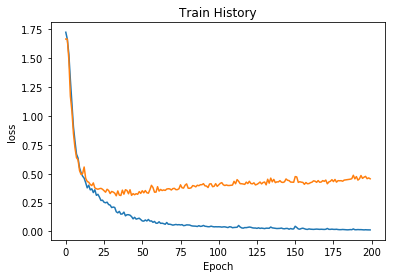

In [0]:
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history, 'loss', 'val_loss')

In [0]:
loss, accuracy = model.evaluate(x_array,y_train_onehot)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

2528/2528 [==============================] - 10s 4ms/step

Loss: 0.10, Accuracy: 98.30%


In [0]:
#y_test_onehot = np_utils.to_categorical(y_test)
#print(y_test_onehot)
#score = model.evaluate(tx_array)
Y_pred = model.predict(tx_array)
predictions = model.predict_classes(tx_array)

In [0]:
print(type(Y_pred))
#print(np_utils.to_categorical(Y_pred))
print(predictions)
print(np_utils.to_categorical(predictions))
#print(len(predictions))

dataframe = pd.DataFrame({'Label':predictions})
dataframe.to_csv('UPtest.csv')
#with open('test2.csv','w',newline='') as csvfile:
#  writer = csv.writer(csvfile)
#  writer.writerow['Label']
#  for i in range(len(predictions)):
#    print(predictions[i])
#    writer.writerow(predictions[i])
  

<class 'numpy.ndarray'>
[1 2 5 ... 1 3 1]
[[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]


In [0]:
#print(tstlab)
#print(x_array.shape)
#print(tx_array.shape)
#print(tstimg[0].shape)
#print(x_train[0].shape)